In [2]:
from random import gauss
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import math

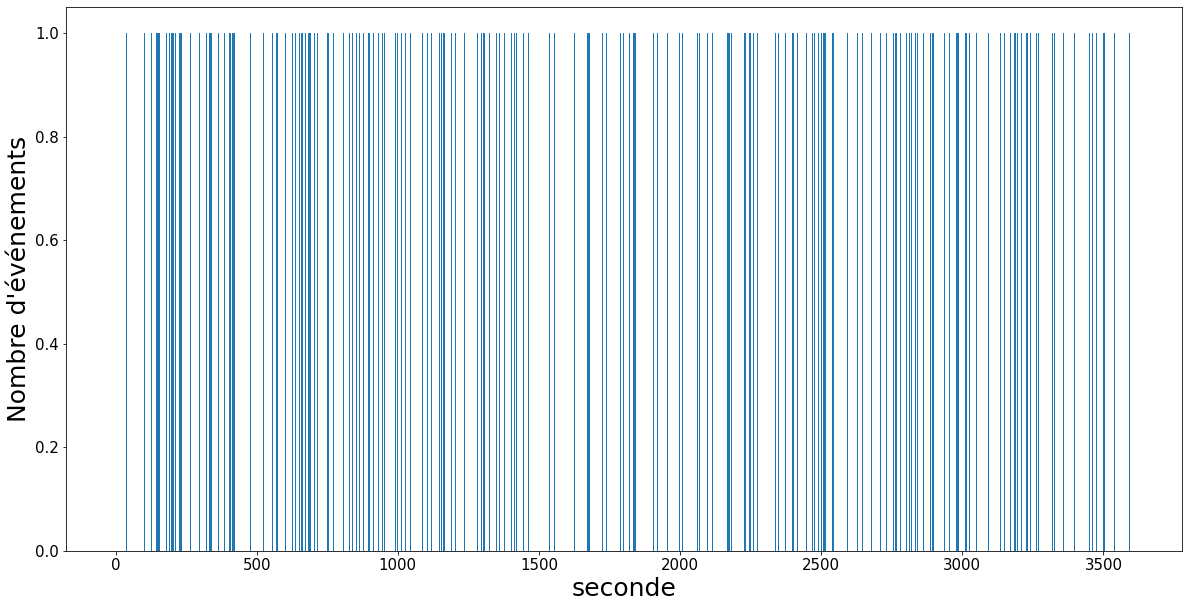

In [102]:
#On choisit le nombre d'événements avec une distribution de poisson et une distribution uniforme dans le temps
N_ev=np.random.poisson(1000)
t=np.random.uniform(0,3600,N_ev)


#On choisit les paramètres de l'anomalie gaussienne
nombre_anomalie_gauss=2  #On choisit le nombre d'anomalie
t_anomalie=[3000,2000] #On choisit quand se passe l'anomalie (moyenne de la gaussienne)
long_flare=[10,20]  #On choisit la longueur du flare (écart type)
N_ev_anomalie=[5,8] #On choisit le nombre d'événement de l'anomalie

anomalie_gauss = [None for x in range(nombre_anomalie_gauss)]
t_finale=[None for x in range(nombre_anomalie_gauss)]

for j in range(len(t_anomalie)):
    if j==0:
        anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
        t_finale[j]=np.append(t,anomalie_gauss[j])
    else:
        anomalie_gauss[j]=[gauss(t_anomalie[j],long_flare[j]) for i in range(N_ev_anomalie[j])]
        t_finale[j]=np.append(t_finale[j-1],anomalie_gauss[j])


#On plotte le diagramme
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(t_finale[nombre_anomalie_gauss-1],1)
ax.set_xlabel("seconde",fontsize=25)
ax.set_ylabel("Nombre d'événements",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()